In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("C://Users//ahmed//Desktop//Titanic-Dataset.csv")

print("Original Data Info:")
df.info()
print("\nMissing values before cleaning:")
print(df.isnull().sum())

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
C

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ahmed\AppData\Local\Temp\ipykernel_1808\1576849666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_1808\1576849666.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


# Drop columns that are not useful for machine learning
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

Box plot visual saved as 'outlier_boxplots.png'


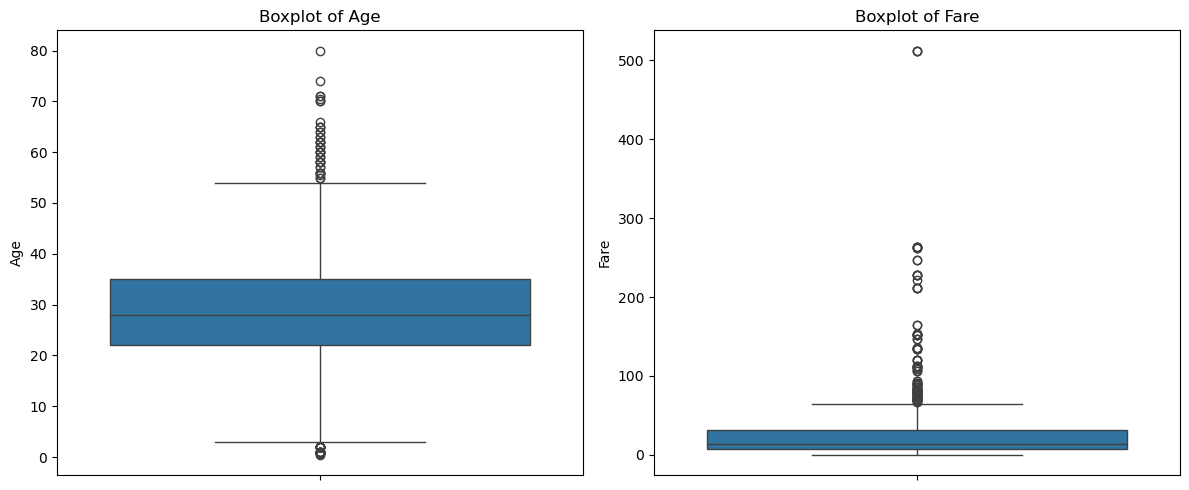

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.savefig('outlier_boxplots.png')
print("Box plot visual saved as 'outlier_boxplots.png'")

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_no_outliers = remove_outliers(df, 'Fare')
df_no_outliers = remove_outliers(df_no_outliers, 'Age')


print(f"\nOriginal number of rows: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_no_outliers.shape[0]}")



Original number of rows: 891
Number of rows after removing outliers: 708


In [15]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df_no_outliers[numerical_features] = scaler.fit_transform(df_no_outliers[numerical_features])

# Display the first few rows of the cleaned and preprocessed data
print("\nCleaned and Preprocessed Data (First 5 Rows):")
print(df_no_outliers.head())

# Save the cleaned data to a new CSV file
df_no_outliers.to_csv('cleaned_titanic_dataset.csv', index=False)


Cleaned and Preprocessed Data (First 5 Rows):
   Survived  Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0         0       3 -0.637115  0.714397 -0.401235 -0.737419      True   
2         1       3 -0.216039 -0.475704 -0.401235 -0.687065     False   
3         1       1  0.731381  0.714397 -0.401235  2.682952     False   
4         0       3  0.731381 -0.475704 -0.401235 -0.677740      True   
5         0       3 -0.005501 -0.475704 -0.401235 -0.647281      True   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  
